In [1]:
import numpy as np
import matplotlib.pyplot as plt

def make_positive_data(n_instances, fraction_of_outliers, n_informative_features, n_non_informative_features, std, outliers_std):
    n_inliers = int((1 - fraction_of_outliers) * n_instances)
    n_outliers = n_instances - n_inliers

    inliers_informative = np.random.normal(1, std, size=(n_inliers, n_informative_features))
    inliers_non_informative = np.random.normal(0, std, size=(n_inliers, n_non_informative_features))

    outliers_informative = np.random.normal(-1, outliers_std, size=(n_outliers, n_informative_features))
    outliers_non_informative = np.random.normal(0, std, size=(n_outliers, n_non_informative_features))

    positive_data = np.concatenate((np.hstack((inliers_informative, inliers_non_informative)),
                                    np.hstack((outliers_informative, outliers_non_informative))))

    return positive_data

def make_negative_data(n_instances, n_informative_features, n_non_informative_features, std):
    informative_data = np.random.normal(-1, std, size=(n_instances, n_informative_features))
    non_informative_data = np.random.normal(0, std, size=(n_instances, n_non_informative_features))
    
    negative_data = np.hstack((informative_data, non_informative_data))

    return negative_data

def make_dataset(n_instances, fraction_of_outliers, n_informative_features, n_non_informative_features, std, outliers_std):
    n_positive_instances = n_instances // 2
    n_negative_instances = n_instances - n_positive_instances

    positive_data = make_positive_data(n_positive_instances, fraction_of_outliers, n_informative_features, n_non_informative_features, std, outliers_std)
    negative_data = make_negative_data(n_negative_instances, n_informative_features, n_non_informative_features, std)

    data_mtx = np.concatenate((positive_data, negative_data))
    targets = np.concatenate((np.ones(n_positive_instances), np.zeros(n_negative_instances)))

    # Shuffle data and targets
    idx = np.random.permutation(n_instances)
    data_mtx = data_mtx[idx]
    targets = targets[idx]

    return data_mtx, targets

def plot2d(data_mtx, targets=None, title='2D Plot', size=10):
    plt.figure(figsize=(size, size))
    if targets is None:
        plt.scatter(data_mtx[:, 0], data_mtx[:, 1])
    else:
        plt.scatter(data_mtx[:, 0], data_mtx[:, 1], c=targets, cmap='viridis')
    plt.title(title)
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.colorbar(label='Target')
    plt.grid(True)
    plt.show()

def plot3d(data_mtx, targets=None, title='3D Plot', size=10):
    fig = plt.figure(figsize=(size, size))
    ax = fig.add_subplot(111, projection='3d')
    if targets is None:
        ax.scatter(data_mtx[:, 0], data_mtx[:, 1], data_mtx[:, 2])
    else:
        ax.scatter(data_mtx[:, 0], data_mtx[:, 1], data_mtx[:, 2], c=targets, cmap='viridis')
    ax.set_title(title)
    ax.set_xlabel('Feature 1')
    ax.set_ylabel('Feature 2')
    ax.set_zlabel('Feature 3')
    ax.legend(loc='upper right')
    plt.colorbar(label='Target')
    plt.show()

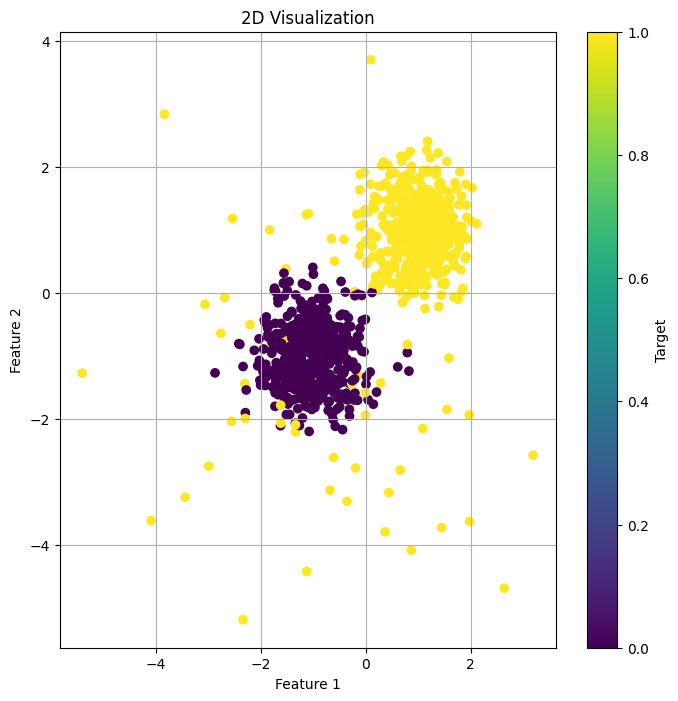

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Unexpected exception formatting exception. Falling back to standard exception


Traceback (most recent call last):
  File "c:\Users\TeymurRzali\AppData\Local\Programs\Python\Python311\Lib\site-packages\IPython\core\interactiveshell.py", line 3508, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
    ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\TeymurRzali\AppData\Local\Temp\ipykernel_26932\3737666751.py", line 16, in <module>
    plot3d(data_mtx, targets, title='3D Visualization', size=8)
    ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\TeymurRzali\AppData\Local\Temp\ipykernel_26932\811681980.py", line 69, in plot3d
    plt.colorbar(label='Target')
    ^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\TeymurRzali\AppData\Local\Programs\Python\Python311\Lib\site-packages\matplotlib\pyplot.py", line 2133, in colorbar
    raise RuntimeError('No mappable was found to use for colorbar '
    ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
RuntimeError: No mappable was found to use for col

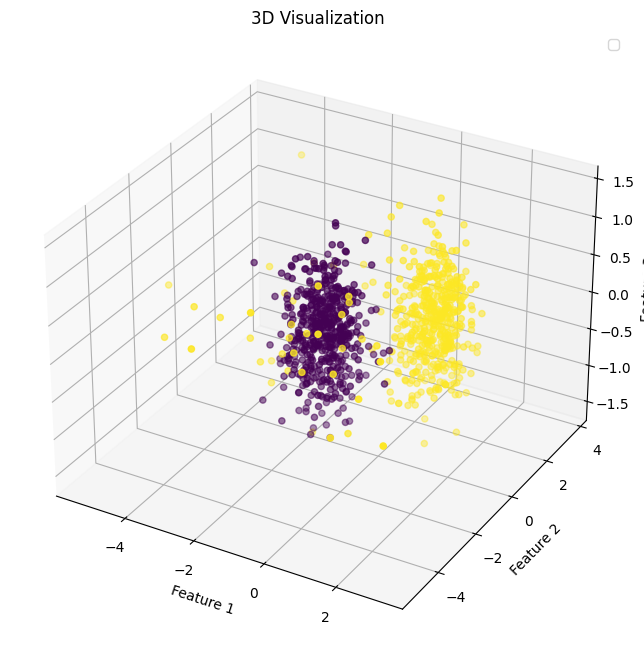

In [2]:
# Define parameters
n_instances = 1000
fraction_of_outliers = 0.1
n_informative_features = 2
n_non_informative_features = 3
std = 0.5
outliers_std = 2.0

# Generate synthetic dataset
data_mtx, targets = make_dataset(n_instances, fraction_of_outliers, n_informative_features, n_non_informative_features, std, outliers_std)

# Plot 2D visualization
plot2d(data_mtx, targets, title='2D Visualization', size=8)

# Plot 3D visualization
plot3d(data_mtx, targets, title='3D Visualization', size=8)